In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as T
from torchvision.models import vgg16, resnet18
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm

In [6]:
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load Dataset

In [7]:
images_train = pd.read_pickle('../data/train.pkl')
images_test = pd.read_pickle('../data/test.pkl')
y_train = np.array(pd.read_csv('../data/train_y.csv', index_col=0))

In [ ]:
# One hot encoding 
def to_categorical(y, num_classes):
    return np.eye(num_classes)[y]

# Encode Y to categorical because we have 10 predictions classes
y_train = to_categorical(y_train, 10)
y_train = y_train[:,0]

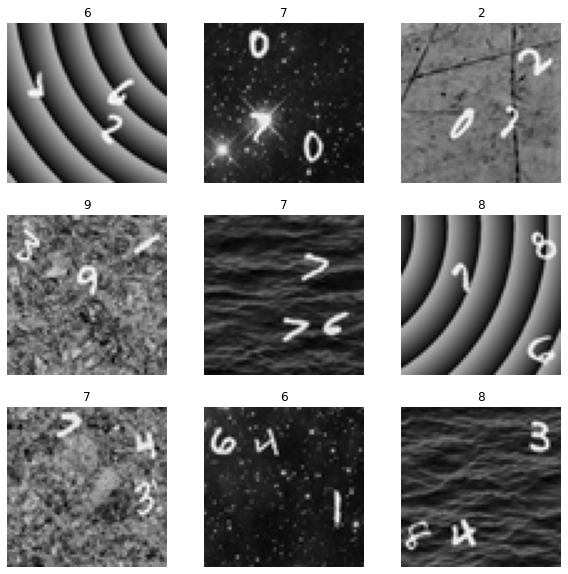

In [8]:
fig, ax = plt.subplots(3,3)
plot_index = [(i, j) for i in range(3) for j in range(3)]
for image, i, label in zip(images_train, plot_index, y_train):
    ax[i].axis('off')
    ax[i].imshow(image, cmap="gray")
    ax[i].set_title(label[0])